In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [76]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)
# df =df.dropna(axis='columns')
df = df.dropna(axis=1)  # Drop columns with all NaN values

Original data shape: (500, 34470)
Num of missing values: 311824
Percentage of missing values: 1.81%
Data shape after dropping all-NaN columns: (500, 34470)


In [77]:
X = df.drop(['patient_id', 'healthy'], axis=1)
y = df['healthy']
# Create train, validation, and test sets
# First split into temp training (80%) and test (20%)
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.1, random_state=42)




Decision Tree - Cross-validation Accuracy: 0.9620 ± 0.0060
Decision Tree - Validation Accuracy: 0.9800
Random Forest - Cross-validation Accuracy: 0.9560 ± 0.0040
Random Forest - Validation Accuracy: 1.0000
SVM - Cross-validation Accuracy: 0.9620 ± 0.0140
SVM - Validation Accuracy: 1.0000
KNN - Cross-validation Accuracy: 0.9840 ± 0.0040
KNN - Validation Accuracy: 0.9800
Gradient Boosting - Cross-validation Accuracy: 0.9500 ± 0.0180
Gradient Boosting - Validation Accuracy: 0.9800
Neural Network - Cross-validation Accuracy: 0.9520 ± 0.0000
Neural Network - Validation Accuracy: 1.0000


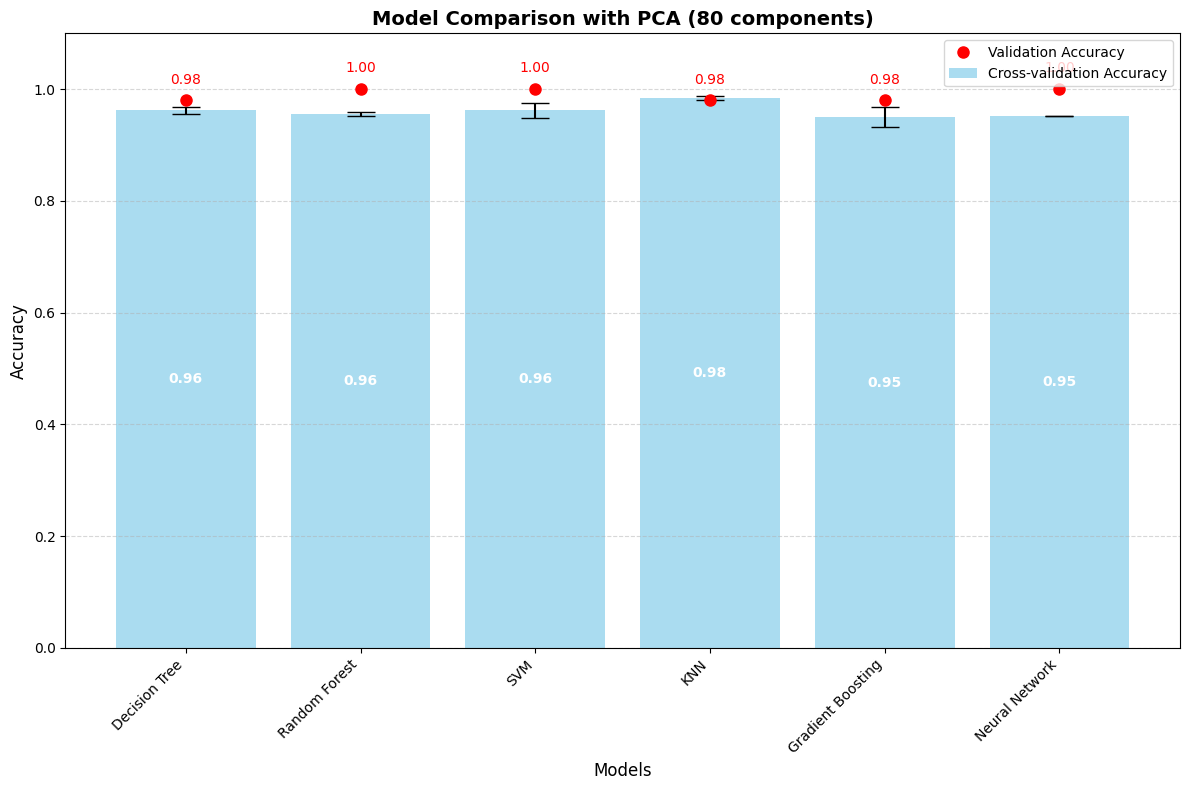

In [ ]:
# Define features and target

components = 249
# Create a pipeline with PCA and various classifiers
models = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=components)),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=components)),
        ('classifier', RandomForestClassifier())    
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=components)),
        ('classifier', SVC(probability=True))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=components)),
        ('classifier', KNeighborsClassifier())
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=components)),
        ('classifier', GradientBoostingClassifier())
    ]),
    'Neural Network': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=components)),
        ('classifier', MLPClassifier(max_iter=1000))
    ])
}

# Evaluate each model with cross-validation
results = {}
model_names = list(models.keys())
accuracies = []
std_devs = []
validation_accuracies = []
test_accuracies = []

for name, model in models.items():
    # Only run cross_val_score once
    scores = cross_val_score(model, X, y, cv=2, scoring='accuracy')
    model.fit(X_train_full, y_train_full)
    val_preds = model.predict(X_val)
    
    # Calculate metrics
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Store results for each model
    results[name] = {
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy,
        'validation_accuracy': val_accuracy,
    }
    
    # Store in lists for plotting
    accuracies.append(mean_accuracy)
    std_devs.append(std_accuracy)
    validation_accuracies.append(val_accuracy)

    print(f"{name} - Cross-validation Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"{name} - Validation Accuracy: {val_accuracy:.4f}")

# Create a comparison plot
plt.figure(figsize=(12, 8))

# Create bar chart with cross-validation accuracy
bars = plt.bar(model_names, accuracies, yerr=std_devs, capsize=10, alpha=0.7, color='skyblue', label='Cross-validation Accuracy')

# Add validation accuracy as a separate point
plt.plot(model_names, validation_accuracies, 'ro', markersize=8, label='Validation Accuracy')

# Add test accuracy as another point
# plt.plot(model_names, test_accuracies, 'go', markersize=8, label='Test Accuracy')

# Add text labels for cross-validation accuracy
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    plt.text(i, acc/2, f'{acc:.2f}', ha='center', va='center', color='white', fontweight='bold')

# Add text labels for validation and test accuracy
for i, v in enumerate(validation_accuracies):
    plt.text(i, v + 0.03, f'{v:.2f}', ha='center', fontsize=10, color='red')
# for i, t in enumerate(test_accuracies):
#     plt.text(i, t - 0.03, f'{t:.2f}', ha='center', fontsize=10, color='green')

plt.title(f'Model Comparison with PCA ({components} components)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1.1)  # Adjusted to fit the text labels
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.tight_layout()

Top 20 features contributing to the first PCA component:
                  Feature    Weight
1924   ENSG00000103429.11  0.008031
3226   ENSG00000115806.13  0.008011
3822   ENSG00000122299.12  0.008010
11687  ENSG00000187555.16  0.007998
3232   ENSG00000115840.14  0.007974
9283   ENSG00000170144.21  0.007958
5304   ENSG00000136731.13  0.007949
9831   ENSG00000173692.14  0.007939
3698   ENSG00000120733.14  0.007937
83     ENSG00000006007.12  0.007932
307    ENSG00000023228.14  0.007931
1923   ENSG00000103423.14  0.007930
12301  ENSG00000197713.15  0.007926
4403   ENSG00000128708.13  0.007925
9115   ENSG00000168958.20  0.007919
11835  ENSG00000188554.15  0.007917
1914   ENSG00000103342.13  0.007914
6886   ENSG00000152102.18  0.007914
5822   ENSG00000140694.17  0.007914
3122   ENSG00000115053.17  0.007913


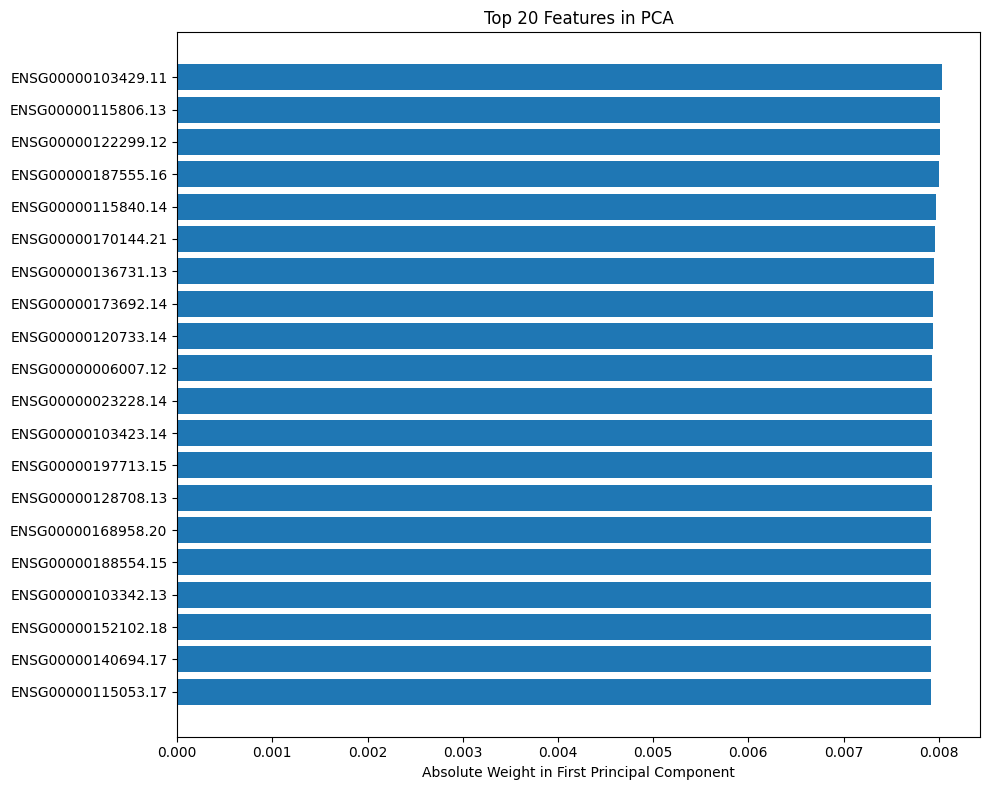

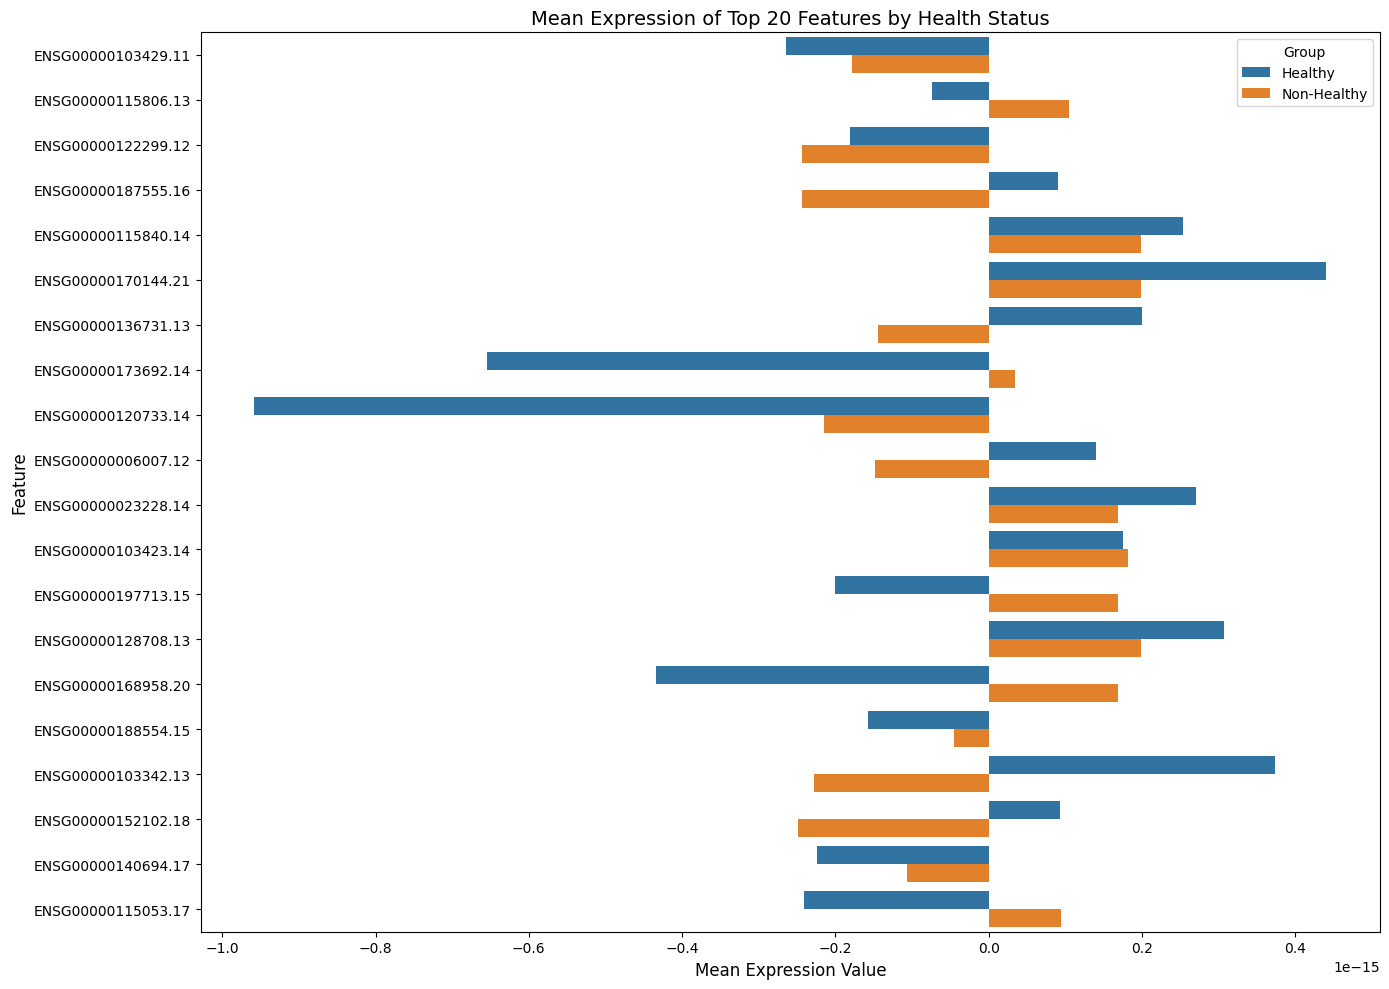

In [60]:

pca = PCA(n_components=1).fit(X)

# Get the PCA components (loadings)
components = pca.components_

# Create a DataFrame of feature importances
component_df = pd.DataFrame()
component_df['Feature'] = X.columns
component_df['Weight'] = np.abs(components[0])  # Take absolute values for importance

# Sort by absolute weight
component_df = component_df.sort_values('Weight', ascending=False)

# Display top features
top_n = 20  # Number of top features to display
print(f"Top {top_n} features contributing to the first PCA component:")
print(component_df.head(top_n))

# Plot top features
plt.figure(figsize=(10, 8))
plt.barh(component_df['Feature'].head(top_n)[::-1], component_df['Weight'].head(top_n)[::-1])
plt.xlabel('Absolute Weight in First Principal Component')
plt.title(f'Top {top_n} Features in PCA')
plt.tight_layout()
plt.show()


# Get the top 20 features from the component dataframe
top_features = component_df.head(top_n)['Feature'].values

# Create a dataframe with just these top features
top_features_df = df[np.append(top_features, 'healthy')]

# Calculate mean values for each group
healthy_means = top_features_df[top_features_df['healthy'] == 1][top_features].mean()
unhealthy_means = top_features_df[top_features_df['healthy'] == 0][top_features].mean()

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Feature': top_features,
    'Healthy': healthy_means.values,
    'Non-Healthy': unhealthy_means.values
})

# Melt the dataframe for easier plotting with seaborn
melted_df = pd.melt(comparison_df, id_vars=['Feature'], var_name='Group', value_name='Mean Expression')

# Create the plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Mean Expression', y='Feature', hue='Group', data=melted_df)
plt.title('Mean Expression of Top 20 Features by Health Status', fontsize=14)
plt.xlabel('Mean Expression Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.legend(title='Group')
plt.show()

Top 9 most important features:
             Feature  Importance
0  ENSG00000229910.1    0.005107
1  ENSG00000223488.2    0.005106
2  ENSG00000266107.1    0.004463
3  ENSG00000109208.5    0.004462
4  ENSG00000152266.7    0.004277
5  ENSG00000219095.1    0.004250
6  ENSG00000226209.1    0.004140
7  ENSG00000255138.1    0.004089
8  ENSG00000223308.1    0.004077


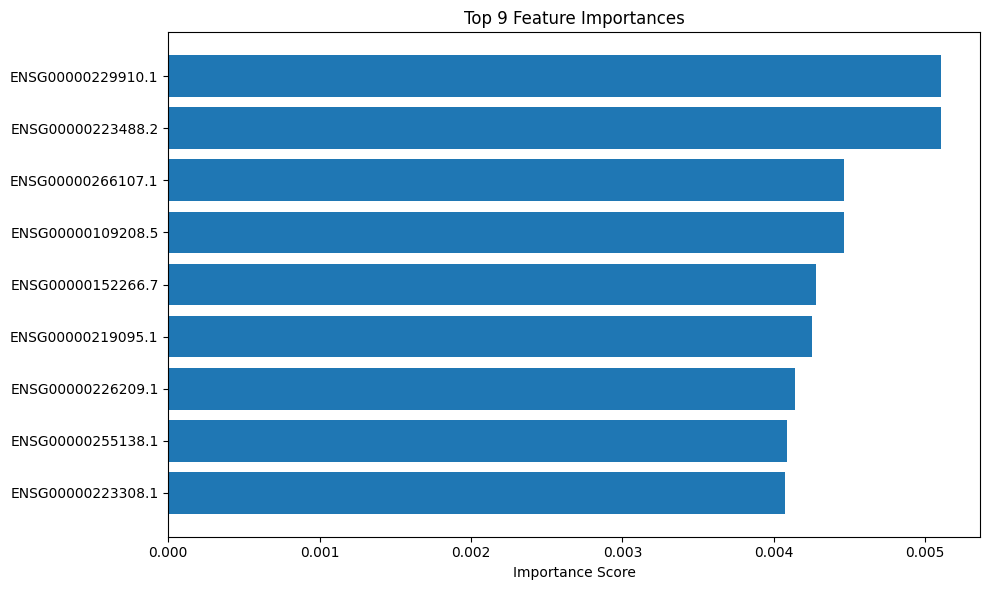

In [61]:
# Get the Random Forest model
rf_model = models['Random Forest']

# Fit the model to get feature importances
rf_model.fit(X, y)

# Get the PCA step and the classifier from the pipeline
pca = rf_model.named_steps['pca']
rf_classifier = rf_model.named_steps['classifier']

# Get feature importances for PCA components
component_importances = rf_classifier.feature_importances_

# Get the PCA components (loadings)
components = pca.components_

# Calculate feature importances in the original feature space
# This maps component importances back to original features
feature_importances = np.abs(components.T.dot(component_importances))

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display top 5 features
top_5_features = importance_df.head(9)
print("Top 9 most important features:")
print(top_5_features)

# Plot top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 9 Feature Importances')
plt.gca().invert_yaxis()  # To display highest importance at the top
plt.tight_layout()